In [1]:
import os
import glob
import datetime
import statistics
import numpy as np
import pandas as pd
import import_ipynb
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [2]:
#from qp import get_stocks # 1/PBR + GP/A
#from ncav import get_stocks # NCAV
from super_value import get_stocks
#from super_quality import get_stocks

importing Jupyter notebook from super_value.ipynb
importing Jupyter notebook from common.ipynb


In [3]:
MODEL_NAME = 'super-value'
DATA_DIR = 'data/daily/8-1'

In [4]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [5]:
df_account

,start_date,end_date,filepath
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv


In [6]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: get_stocks(x.filepath, x.start_date), axis=1)

------------------------------
2002-08-01 data/daily/8-1/2002-08-01.csv
전체 1576
지주사, 금융사 제외 1477


common.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "\n",


국외주식 제외 1477
가격정보 없는 기업 제외 1051
선정 기업 수 30
------------------------------
2003-08-01 data/daily/8-1/2003-08-01.csv
전체 1668
지주사, 금융사 제외 1569
국외주식 제외 1569
가격정보 없는 기업 제외 1129
선정 기업 수 30
------------------------------
2004-08-02 data/daily/8-1/2004-08-02.csv
전체 1716
지주사, 금융사 제외 1614
국외주식 제외 1614
가격정보 없는 기업 제외 1180
선정 기업 수 30
------------------------------
2005-08-01 data/daily/8-1/2005-08-01.csv
전체 1812
지주사, 금융사 제외 1708
국외주식 제외 1707
가격정보 없는 기업 제외 1234
선정 기업 수 30
------------------------------
2006-08-01 data/daily/8-1/2006-08-01.csv
전체 1861
지주사, 금융사 제외 1754
국외주식 제외 1752
가격정보 없는 기업 제외 1293
선정 기업 수 30
------------------------------
2007-08-01 data/daily/8-1/2007-08-01.csv
전체 1952
지주사, 금융사 제외 1841
국외주식 제외 1835
가격정보 없는 기업 제외 1360
선정 기업 수 30
------------------------------
2008-08-01 data/daily/8-1/2008-08-01.csv
전체 2046
지주사, 금융사 제외 1930
국외주식 제외 1920
가격정보 없는 기업 제외 1445
선정 기업 수 30
------------------------------
2009-08-03 data/daily/8-1/2009-08-03.csv
전체 2096
지주사, 금융사 제외 1975
국외주식 제외 1959
가격정보 없는

In [19]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')
df_account['out'] = 0

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        df_this_year = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        df_next_year = pd.read_csv(filepaths[i + 1], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        
        stocks = df_account.iloc[i].stocks   
        yields = []
        
        # 종목별 수익률, 상장폐지 기업 수를 구한다.
        out = 0 # 상장폐지 기업 수
        for stock in stocks:
            start_price = df_this_year[df_this_year['종목코드'] == stock]['주가'].iloc[0]
            end_price = df_next_year[df_next_year['종목코드'] == stock]['주가']
            
            if len(end_price) == 0:
                end_price = 0
            else:                    
                end_price = end_price.fillna(0) # 가격 정보가 없을 경우 상폐
                end_price = end_price.iloc[0]
                
            if end_price == 0:
                out += 1
            
            # get yield
            yields.append(end_price / start_price)

        # stock 수익률들의 avg가 total 수익률이 된다. (동일 비중이기 때문에)
        mean_yields = statistics.mean(yields)
        df_account.at[i, 'yield'] = mean_yields
        df_account.at[i, 'yields'] = yields
        df_account.at[i, 'out'] = out
        
        print(start_date, '~', end_date, ":", mean_yields)
        
        #break

2002-08-01 ~ 2003-08-01 : 0.924786710359779
2003-08-01 ~ 2004-08-02 : 0.9454279515710593
2004-08-02 ~ 2005-08-01 : 2.213388370950187
2005-08-01 ~ 2006-08-01 : 1.324437754514789
2006-08-01 ~ 2007-08-01 : 2.2390249689323136
2007-08-01 ~ 2008-08-01 : 0.8410527214980837
2008-08-01 ~ 2009-08-03 : 1.1236368034618525
2009-08-03 ~ 2010-08-02 : 1.4622154705406356
2010-08-02 ~ 2011-08-01 : 1.1549745144559151
2011-08-01 ~ 2012-08-01 : 1.2173960315640102
2012-08-01 ~ 2013-08-01 : 1.2638085502570633
2013-08-01 ~ 2014-08-01 : 1.2148130529404932
2014-08-01 ~ 2015-08-03 : 1.7303340954229234
2015-08-03 ~ 2016-08-01 : 1.5298212615473556
2016-08-01 ~ 2017-08-01 : 1.071019487641068
2017-08-01 ~ 2018-08-01 : 1.8200313346943575
2018-08-01 ~ 2019-08-01 : 0.8223663547695828


In [20]:
df_account['total'] = df_account['yield'].cumprod()

In [21]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/(i+1))

In [22]:
def get_win_rate(yield_rates):
    return sum([yield_rate > 1.0 for yield_rate in yield_rates]) / len(yield_rates)

df_account['win_rate'] = df_account.apply(lambda x: get_win_rate(x['yields']), axis=1)

In [23]:
df_account['best_corp'] = df_account.apply(lambda x: max(x['yields']), axis=1)
df_account['worst_corp'] = df_account.apply(lambda x: min(x['yields']), axis=1)

In [24]:
df_account['best_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmax(x['yields'])], axis=1)
df_account['worst_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmin(x['yields'])], axis=1)

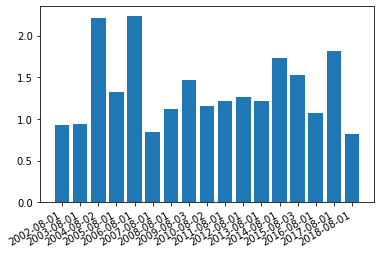

In [25]:
fig, ax = plt.subplots()
plt.bar(df_account['start_date'], df_account['yield'])
fig.autofmt_xdate()
plt.show()

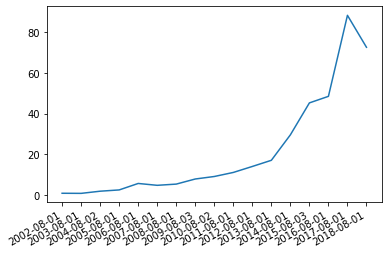

In [26]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

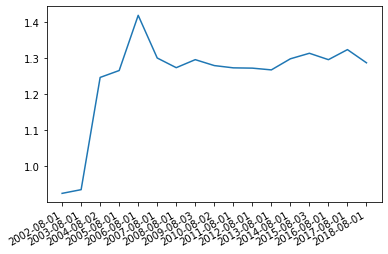

In [27]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['cagr'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [28]:
1 - min(df_account['yield'])

0.17763364523041725

In [29]:
max(df_account['yield'])

2.2390249689323136

In [31]:
sum(df_account['out'])

7

In [30]:
df_account

,start_date,end_date,filepath,stocks,yield,yields,out,total,cagr,win_rate,best_corp,worst_corp,best_stock_code,worst_stock_code
0,2002-08-01,2003-08-01,data/daily/8-1/2002-08-01.csv,"[001070, 021820, 002700, 003280, 000850, 00561...",0.924787,"[1.1214953271028036, 0.8781609195402299, 1.064...",0,0.924787,0.924787,0.266667,2.500000,0.082370,013360,012620
1,2003-08-01,2004-08-02,data/daily/8-1/2003-08-01.csv,"[003280, 006090, 021820, 011300, 009460, 00236...",0.945428,"[0.6844919786096256, 4.596273291925466, 0.9319...",0,0.874319,0.935050,0.300000,4.596273,0.050658,006090,025950
2,2004-08-02,2005-08-01,data/daily/8-1/2004-08-02.csv,"[008830, 021820, 009460, 015230, 011390, 01692...",2.213388,"[1.5637860082304527, 3.1601123595505616, 1.920...",0,1.935208,1.246166,1.000000,4.279070,1.278997,010960,038010
3,2005-08-01,2006-08-01,data/daily/8-1/2005-08-01.csv,"[011300, 005670, 038010, 004780, 032750, 00946...",1.324438,"[0.9310344827586207, 1.2547945205479452, 1.756...",0,2.563062,1.265289,0.700000,3.633257,0.142857,014470,009460
4,2006-08-01,2007-08-01,data/daily/8-1/2006-08-01.csv,"[021050, 005710, 004780, 004100, 009470, 03924...",2.239025,"[1.9662921348314606, 1.9273356401384083, 1.689...",0,5.738761,1.418285,0.933333,7.449393,0.287037,010960,001620
5,2007-08-01,2008-08-01,data/daily/8-1/2007-08-01.csv,"[009470, 006060, 038340, 066670, 008500, 04847...",0.841053,"[2.252042007001167, 0.7188118811881188, 0.6255...",0,4.826600,1.299991,0.200000,2.252042,0.051104,009470,010600
6,2008-08-01,2009-08-03,data/daily/8-1/2008-08-01.csv,"[038340, 066670, 051630, 025440, 003780, 01918...",1.123637,"[0.8414239482200647, 2.5651105651105652, 0.798...",0,5.423346,1.273196,0.333333,3.054755,0.628866,092300,011080
7,2009-08-03,2010-08-02,data/daily/8-1/2009-08-03.csv,"[011300, 017680, 079650, 024900, 005030, 03801...",1.462215,"[0.1786492374727669, 1.1111111111111112, 1.063...",0,7.930100,1.295418,0.833333,3.573770,0.178649,073070,011300
8,2010-08-02,2011-08-01,data/daily/8-1/2010-08-02.csv,"[011300, 002140, 079650, 053060, 033340, 00536...",1.154975,"[2.1682926829268294, 1.1386430678466077, 1.048...",0,9.159064,1.279005,0.566667,2.815789,0.098592,049800,025880
9,2011-08-01,2012-08-01,data/daily/8-1/2011-08-01.csv,"[015260, 006580, 005030, 068060, 044380, 05306...",1.217396,"[1.4107883817427387, 1.1053240740740742, 0.946...",0,11.150208,1.272707,0.733333,3.945946,0.711697,005190,067770


In [ ]:
df_account.to_csv('log/' + MODEL_NAME + '-' + os.path.basename(DATA_DIR) + '.csv', index=False)

In [ ]:
1